## Linear Regression
An estimator is any model that tries to estimate a variable y from another variable(s) x given pairs of data (x<sub>1</sub>,y<sub>1</sub>),(x<sub>2</sub>,y<sub>2</sub>),...,(x<sub>N</sub>,y<sub>N</sub>)

Regression is when the targets (y) are quantities (not cat vs dog but rather price of a house)

An example would be trying to guess how many people will buy icecream from a shop at any day given the temprature on that day. In this case, the target is the number of icecream people will buy, it is an integer and any value (ex: 14 icecreams) doesn't represent a particular class, so it will be represented as a regression problem. In this case, it turns out that x is also a quantity (temprature); however, this is not necessary and is tackled by approaches other than linear regression.

To estimate the price of the icecream from temperature we gather the data on various days from various different places and get the following data.



We can see that a line (could  also be a curve) could fit the data, but how can we find which line exactly.

#### Line Equation Review
A line in 2D can be parametrized using a slope m and a y-intercept b which would result in it having an equation

$$y = mx+b$$

In the example of the icecream, if the temperature at a day was 30, our prediction for the number of icecreams sold would be m\*30 + b, so we simply need to find m and b.

#### Squared Loss
We need some measurement of how good our line is to be able to find the "best" line, so we will measure the difference between our predictions and the correct values from the data.


Then, we will square all the differences and add them up. This will be the value we try to minimize.

#### Note
The normal equation will probably not work. It is left for you to figure it out and let everyone else know, let's see who figures it out first (it's a tricky issue).




In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
class Linear_Regression():
    '''
    Linear Regression model created using only NumPy
    
    Attributes
    ----------
    weights: np.array of floats
        All the parameters of the model (including bias)
    '''
    def __init__(self):
        self.weights = None
        
    def train(self,data_X,data_y):
        '''
        Train the model using the given data
        
        Parameters
        ----------
        data_X: np.array, shape = (N, num_features)
            Features from the data, each row is one data point. Assumes that a column of ones was added to data_X
        data_y: np.array, shape = (N, num_targets)
            The target values to predict, each row contains the targets for one data point
        '''
        self.weights = (np.linalg.inv(data_X.T@data_X).dot(data_X.T@data_y).T).reshape(-1)
        return self.weights
    
    def predict(self,x_to_predict):
        '''
        Predict using the given value as input
        
        Assumes that self.train(.,.) has been called before calling this method
        
        Parameters
        ----------
        x_to_predict: np.array, shape = (M, num_features)
            A given list of inputs to predict targets for, each row is one input. Assumes that a column of ones was added similar to the training data
        
        Returns
        -------
        np.array of floats, shape = (M, num_targets)
            Predicted values for each input
        '''
        return np.dot(x_to_predict, self.weights)

### Import the data and remove useless columns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 80)
train0 = pd.read_csv("/content/train.csv")
test0 = pd.read_csv("/content/test.csv")
SalePrice = train0['SalePrice']
test_ids = test0['Id']
train1 = train0.drop(columns=["Id", "SalePrice"])
test1 = test0.drop(columns=["Id"])
df = pd.concat([train1, test1])
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### Handle the missing data (NaNs)

In [ ]:
df.drop(columns=train1.columns[train1.isnull().sum().values>200],inplace=True)
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath     

### Replace categorical data (strings) with numerical values

In [ ]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode()[0])
    uniques = np.unique(df[column].values)
    for idx,item in enumerate(uniques):
        df[column] = df[column].replace(item,idx)

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

### Add the bias column (column of ones)

In [ ]:
df["bias"] = np.ones(df.shape[0])
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,bias
0,5,3,619,1,3,3,0,4,0,5,2,2,0,5,6,4,110,53,1,1,12,13,1,148.0,2,4,2,2,3,3,2,512.0,5,0.0,107.0,261.0,1,0,1,4,197,356,0,766,1.0,0.0,2,1,3,1,2,6,6,0,1,94.0,1,2.0,283.0,4,4,2,0,52,0,0,0,0,0,1,2,8,4,1.0
1,0,3,895,1,3,3,0,2,0,24,1,2,0,2,5,7,83,26,1,1,8,8,2,0.0,3,4,1,2,3,1,0,716.0,5,0.0,230.0,603.0,1,0,1,4,563,0,0,384,0.0,1.0,2,0,3,1,3,4,6,1,1,67.0,1,2.0,202.0,4,4,2,244,0,0,0,0,0,0,4,1,8,4,1.0
2,5,3,1266,1,0,3,0,4,0,5,2,2,0,5,6,4,108,52,1,1,12,13,1,120.0,2,4,2,2,3,2,2,332.0,5,0.0,366.0,307.0,1,0,1,4,254,365,0,821,1.0,0.0,2,1,3,1,2,4,6,1,1,92.0,1,2.0,337.0,4,4,2,0,33,0,0,0,0,0,8,2,8,4,1.0
3,6,3,883,1,0,3,0,0,0,6,2,2,0,5,6,4,25,20,1,1,13,15,2,0.0,3,4,0,3,1,3,0,116.0,5,0.0,462.0,181.0,1,2,1,4,292,283,0,771,1.0,0.0,1,0,3,1,2,5,6,1,5,89.0,2,3.0,366.0,4,4,2,0,26,160,0,0,0,0,1,0,8,0,1.0
4,5,3,1670,1,0,3,0,2,0,15,2,2,0,5,7,4,107,50,1,1,12,13,1,266.0,2,4,2,2,3,0,2,469.0,5,0.0,419.0,504.0,1,0,1,4,462,479,0,1063,1.0,0.0,2,1,4,1,2,7,6,1,1,91.0,1,3.0,495.0,4,4,2,149,73,0,0,0,0,0,11,2,8,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,4,23,1,3,3,0,4,0,10,2,2,3,5,3,6,77,20,1,1,5,5,2,0.0,3,4,1,3,3,3,5,0.0,5,0.0,468.0,69.0,1,2,1,4,23,132,0,242,0.0,0.0,1,1,3,1,3,3,6,0,1,96.0,2,0.0,0.0,4,4,2,0,0,0,0,0,0,0,5,0,8,4,1.0
1455,13,4,20,1,3,3,0,4,0,10,2,2,4,5,3,4,77,20,1,1,5,5,2,0.0,3,4,1,3,3,3,4,143.0,5,0.0,239.0,69.0,1,4,1,4,23,132,0,242,0.0,0.0,1,1,3,1,3,4,6,0,4,61.0,2,1.0,63.0,4,4,2,0,15,0,0,0,0,0,3,0,8,0,1.0
1456,0,3,1863,1,3,3,0,4,0,11,2,2,0,2,4,6,67,46,1,1,12,13,2,0.0,3,4,1,3,3,3,0,848.0,5,0.0,0.0,572.0,1,0,1,4,534,0,0,355,1.0,0.0,1,0,4,1,3,5,6,1,5,51.0,2,2.0,309.0,4,4,2,341,0,0,0,0,0,0,8,0,8,0,1.0
1457,9,3,1090,1,3,3,0,4,0,11,2,2,0,6,4,4,99,42,1,1,6,15,2,0.0,3,4,2,2,3,0,2,207.0,5,0.0,492.0,300.0,1,4,1,4,301,0,0,149,0.0,1.0,1,0,3,1,3,4,6,0,1,96.0,2,0.0,0.0,4,4,2,48,23,0,0,0,0,17,6,0,8,4,1.0


In [ ]:
import scipy
df2 = df.copy()
df2_bias = df2["bias"]
df2.drop(columns=["bias"],inplace=True)
skew = pd.DataFrame(df2.columns, columns=['Features'])
skew['Skew'] = skew['Features'].apply(lambda feature: scipy.stats.skew(df2[feature]))
skew['Absolute Skew'] = skew['Skew'].apply(abs)
skew['Skewed'] = skew['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew.head()

,Features,Skew,Absolute Skew,Skewed
0,MSSubClass,0.738722,0.738722,True
1,MSZoning,-1.751744,1.751744,True
2,LotArea,0.193485,0.193485,False
3,Street,-15.500133,15.500133,True
4,LotShape,-0.617690,0.617690,True


In [ ]:
for column in skew.query("Skewed == True")['Features'].values:
  df2[column] = np.log1p(df2[column])

In [ ]:
skew = pd.DataFrame(df2.columns, columns=['Features'])
skew['Skew'] = skew['Features'].apply(lambda feature: scipy.stats.skew(df2[feature]))
skew['Absolute Skew'] = skew['Skew'].apply(abs)
skew['Skewed'] = skew['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew.head()

,Features,Skew,Absolute Skew,Skewed
0,MSSubClass,-0.132138,0.132138,False
1,MSZoning,-3.388074,3.388074,True
2,LotArea,0.193485,0.193485,False
3,Street,-15.500133,15.500133,True
4,LotShape,-0.650817,0.650817,True


In [ ]:
df2["bias"] = df2_bias
df2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,bias
0,1.791759,1.386294,619,0.693147,1.386294,1.386294,0.0,1.609438,0.000000,5,1.098612,1.098612,0.000000,5,6,1.609438,4.709530,53,0.693147,0.693147,2.564949,2.639057,1,5.003946,1.098612,1.609438,2,1.098612,1.386294,1.386294,2,6.240276,1.791759,0.0,107.0,261.0,0.693147,0,0.693147,1.609438,197,5.877736,0.0,766,0.693147,0.000000,2,0.693147,3,0.693147,1.098612,1.945910,1.94591,0.000000,0.693147,4.553877,1,2.0,283.0,1.609438,1.609438,1.098612,0.000000,3.970292,0.000000,0.0,0.0,0.0,0.000000,1,2,2.197225,1.609438,1.0
1,0.000000,1.386294,895,0.693147,1.386294,1.386294,0.0,1.098612,0.000000,24,0.693147,1.098612,0.000000,2,5,2.079442,4.430817,26,0.693147,0.693147,2.197225,2.197225,2,0.000000,1.386294,1.609438,1,1.098612,1.386294,0.693147,0,6.575076,1.791759,0.0,230.0,603.0,0.693147,0,0.693147,1.609438,563,0.000000,0.0,384,0.000000,0.693147,2,0.000000,3,0.693147,1.386294,1.609438,1.94591,0.693147,0.693147,4.219508,1,2.0,202.0,1.609438,1.609438,1.098612,5.501258,0.000000,0.000000,0.0,0.0,0.0,0.000000,4,1,2.197225,1.609438,1.0
2,1.791759,1.386294,1266,0.693147,0.000000,1.386294,0.0,1.609438,0.000000,5,1.098612,1.098612,0.000000,5,6,1.609438,4.691348,52,0.693147,0.693147,2.564949,2.639057,1,4.795791,1.098612,1.609438,2,1.098612,1.386294,1.098612,2,5.808142,1.791759,0.0,366.0,307.0,0.693147,0,0.693147,1.609438,254,5.902633,0.0,821,0.693147,0.000000,2,0.693147,3,0.693147,1.098612,1.609438,1.94591,0.693147,0.693147,4.532599,1,2.0,337.0,1.609438,1.609438,1.098612,0.000000,3.526361,0.000000,0.0,0.0,0.0,0.000000,8,2,2.197225,1.609438,1.0
3,1.945910,1.386294,883,0.693147,0.000000,1.386294,0.0,0.000000,0.000000,6,1.098612,1.098612,0.000000,5,6,1.609438,3.258097,20,0.693147,0.693147,2.639057,2.772589,2,0.000000,1.386294,1.609438,0,1.386294,0.693147,1.386294,0,4.762174,1.791759,0.0,462.0,181.0,0.693147,2,0.693147,1.609438,292,5.648974,0.0,771,0.693147,0.000000,1,0.000000,3,0.693147,1.098612,1.791759,1.94591,0.693147,1.791759,4.499810,2,3.0,366.0,1.609438,1.609438,1.098612,0.000000,3.295837,5.081404,0.0,0.0,0.0,0.000000,1,0,2.197225,0.000000,1.0
4,1.791759,1.386294,1670,0.693147,0.000000,1.386294,0.0,1.098612,0.000000,15,1.098612,1.098612,0.000000,5,7,1.609438,4.682131,50,0.693147,0.693147,2.564949,2.639057,1,5.587249,1.098612,1.609438,2,1.098612,1.386294,0.000000,2,6.152733,1.791759,0.0,419.0,504.0,0.693147,0,0.693147,1.609438,462,6.173786,0.0,1063,0.693147,0.000000,2,0.693147,4,0.693147,1.098612,2.079442,1.94591,0.693147,0.693147,4.521789,1,3.0,495.0,1.609438,1.609438,1.098612,5.010635,4.304065,0.000000,0.0,0.0,0.0,0.000000,11,2,2.197225,1.609438,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.639057,1.609438,23,0.693147,1.386294,1.386294,0.0,1.609438,0.000000,10,1.098612,1.098612,1.386294,5,3,1.945910,4.356709,20,0.693147,0.693147,1.791759,1.791759,2,0.000000,1.386294,1.609438,1,1.386294,1.386294,1.386294,5,0.000000,1.791759,0.0,468.0,69.0,0.693147,2,0.693147,1.609438,23,4.890349,0.0,242,0.000000,0.000000,1,0.693147

### Divide the data into training, testing, X, and y

In [ ]:
train2 = df2.iloc[:1460, :]
train2.loc[:, 'SalePrice'] = SalePrice
train2 = train2.sample(frac=1).reset_index(drop=True)
training_df = train2[:-100]
val_df = train2[-100:]
training_y = training_df["SalePrice"].values
training_X = training_df.drop(columns=["SalePrice"]).values
val_y = val_df["SalePrice"].values
val_X = val_df.drop(columns=["SalePrice"]).values
test2 = df2.iloc[1460:, :]
test2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,bias
0,0.000000,1.098612,1329,0.693147,1.386294,1.386294,0.0,1.609438,0.000000,12,0.693147,1.098612,0.000000,2,4,1.791759,4.234107,11,0.693147,0.693147,2.564949,2.639057,2,0.000000,1.386294,1.609438,1,1.386294,1.386294,1.386294,4,5.765191,1.386294,3.850148,217.0,279.0,0.693147,4,0.693147,1.609438,233,0.000000,0.0,101,0.000000,0.000000,1,0.000000,2,0.693147,1.386294,1.386294,1.94591,0.000000,0.693147,3.970292,2,1.0,428.0,1.609438,1.609438,1.098612,4.605170,0.000000,0.0,0.0,3.295837,0.0,0.000000,5,4,2.197225,1.609438,1.0
1,0.000000,1.386294,1671,0.693147,0.000000,1.386294,0.0,0.000000,0.000000,12,1.098612,1.098612,0.000000,2,5,1.791759,4.189655,8,1.386294,0.693147,2.639057,2.708050,1,4.317488,1.386294,1.609438,1,1.386294,1.386294,1.386294,0,6.520621,1.791759,0.000000,340.0,652.0,0.693147,4,0.693147,1.609438,619,0.000000,0.0,439,0.000000,0.000000,1,0.693147,3,0.693147,1.098612,1.609438,1.94591,0.000000,0.693147,3.912023,2,1.0,85.0,1.609438,1.609438,1.098612,5.730100,3.332205,0.0,0.0,0.000000,0.0,3.583519,5,4,2.197225,1.609438,1.0
2,1.791759,1.386294,1635,0.693147,0.000000,1.386294,0.0,1.609438,0.000000,8,1.098612,1.098612,0.000000,5,4,1.609438,4.653960,48,0.693147,0.693147,2.564949,2.639057,2,0.000000,1.386294,1.609438,2,1.098612,1.386294,1.386294,2,6.371612,1.791759,0.000000,97.0,314.0,0.693147,2,0.693147,1.609438,261,5.497168,0.0,696,0.000000,0.000000,2,0.693147,3,0.693147,1.386294,1.609438,1.94591,0.693147,0.693147,4.488636,0,2.0,224.0,1.609438,1.609438,1.098612,5.135798,3.258097,0.0,0.0,0.000000,0.0,0.000000,2,4,2.197225,1.609438,1.0
3,1.791759,1.386294,979,0.693147,0.000000,1.386294,0.0,1.609438,0.000000,8,1.098612,1.098612,0.000000,5,5,1.791759,4.663439,48,0.693147,0.693147,2.564949,2.639057,1,2.079442,1.386294,1.609438,2,1.386294,1.386294,1.386294,2,6.054439,1.791759,0.000000,268.0,312.0,0.693147,0,0.693147,1.609438,259,5.420535,0.0,674,0.000000,0.000000,2,0.693147,3,0.693147,1.098612,1.791759,1.94591,0.693147,0.693147,4.499810,0,2.0,212.0,1.609438,1.609438,1.098612,5.669881,3.332205,0.0,0.0,0.000000,0.0,0.000000,5,4,2.197225,1.609438,1.0
4,2.484907,1.386294,178,0.693147,0.000000,0.693147,0.0,1.609438,0.000000,22,1.098612,1.098612,1.609438,2,7,1.609438,4.605170,42,0.693147,0.693147,1.945910,1.945910,2,0.000000,1.098612,1.609438,2,1.098612,1.386294,1.386294,0,5.030438,1.791759,0.000000,816.0,618.0,0.693147,0,0.693147,1.609438,578,0.000000,0.0,398,0.000000,0.000000,2,0.000000,2,0.693147,1.098612,1.386294,1.94591,0.000000,0.693147,4.430817,1,2.0,246.0,1.609438,1.609438,1.098612,0.000000,4.276666,0.0,0.0,3.688879,0.0,0.000000,0,4,2.197225,1.609438,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.639057,1.609438,23,0.693147,1.386294,1.386294,0.0,1.609438,0.000000,10,1.098612,1.098612,1.386294,5,3,1.945910,4.356709,20,0.693147,0.693147,1.791759,1.791759,2,0.000000,1.386294,1.609438,1,1.386294,1.386294,1.386294,5,0.000000,1.791759,0.000000,468.0,69.0,0.693147,2,0.693147,1.609438,23,4.890349,0.0,242,0

### Train the linear regressor

In [ ]:
# Create and fit the model
LR_regressor = Linear_Regression()
LR_regressor.train(training_X,training_y)
y_pred = LR_regressor.predict(val_X)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_pred, val_y), mean_squared_error(y_pred, val_y)

(19686.738664987384, 1026423240.4977139)

In [ ]:
r2_score(val_y, y_pred)

0.8249296336723602

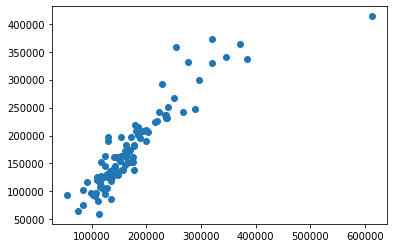

In [ ]:
plt.scatter(val_y, y_pred)

In [ ]:
submission = pd.DataFrame(test_ids, columns=['Id'])
submission['SalePrice'] = LR_regressor.predict(test2)
submission

,Id,SalePrice
0,1461,107753.118000
1,1462,169903.282103
2,1463,187346.639721
3,1464,193279.230547
4,1465,186320.589656
...,...,...
1454,2915,79598.266402
1455,2916,76612.326291
1456,2917,175896.648044
1457,2918,113173.204044


### Train using the sklearn linear regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(training_X, training_y)
y_pred = lin.predict(val_X)

In [ ]:
mean_absolute_error(y_pred, val_y)

19686.738664995188

In [ ]:
r2_score(val_y, y_pred)

0.8249296336723315

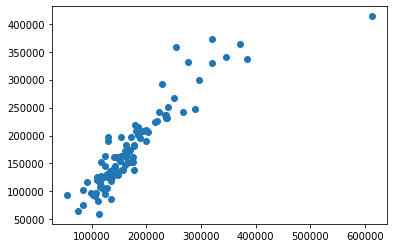

In [ ]:
plt.scatter(val_y, y_pred)